In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="not_conditional_banana",
    dataset_number_of_points=10**6,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="variational_encoder",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=32,
        number_of_hidden_layers=2,
        latent_space_regularizer=0.1
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 100, Objective: 0.411, LR: 0.000000: 100%|██████████| 100/100 [32:13<00:00, 19.34s/it]   


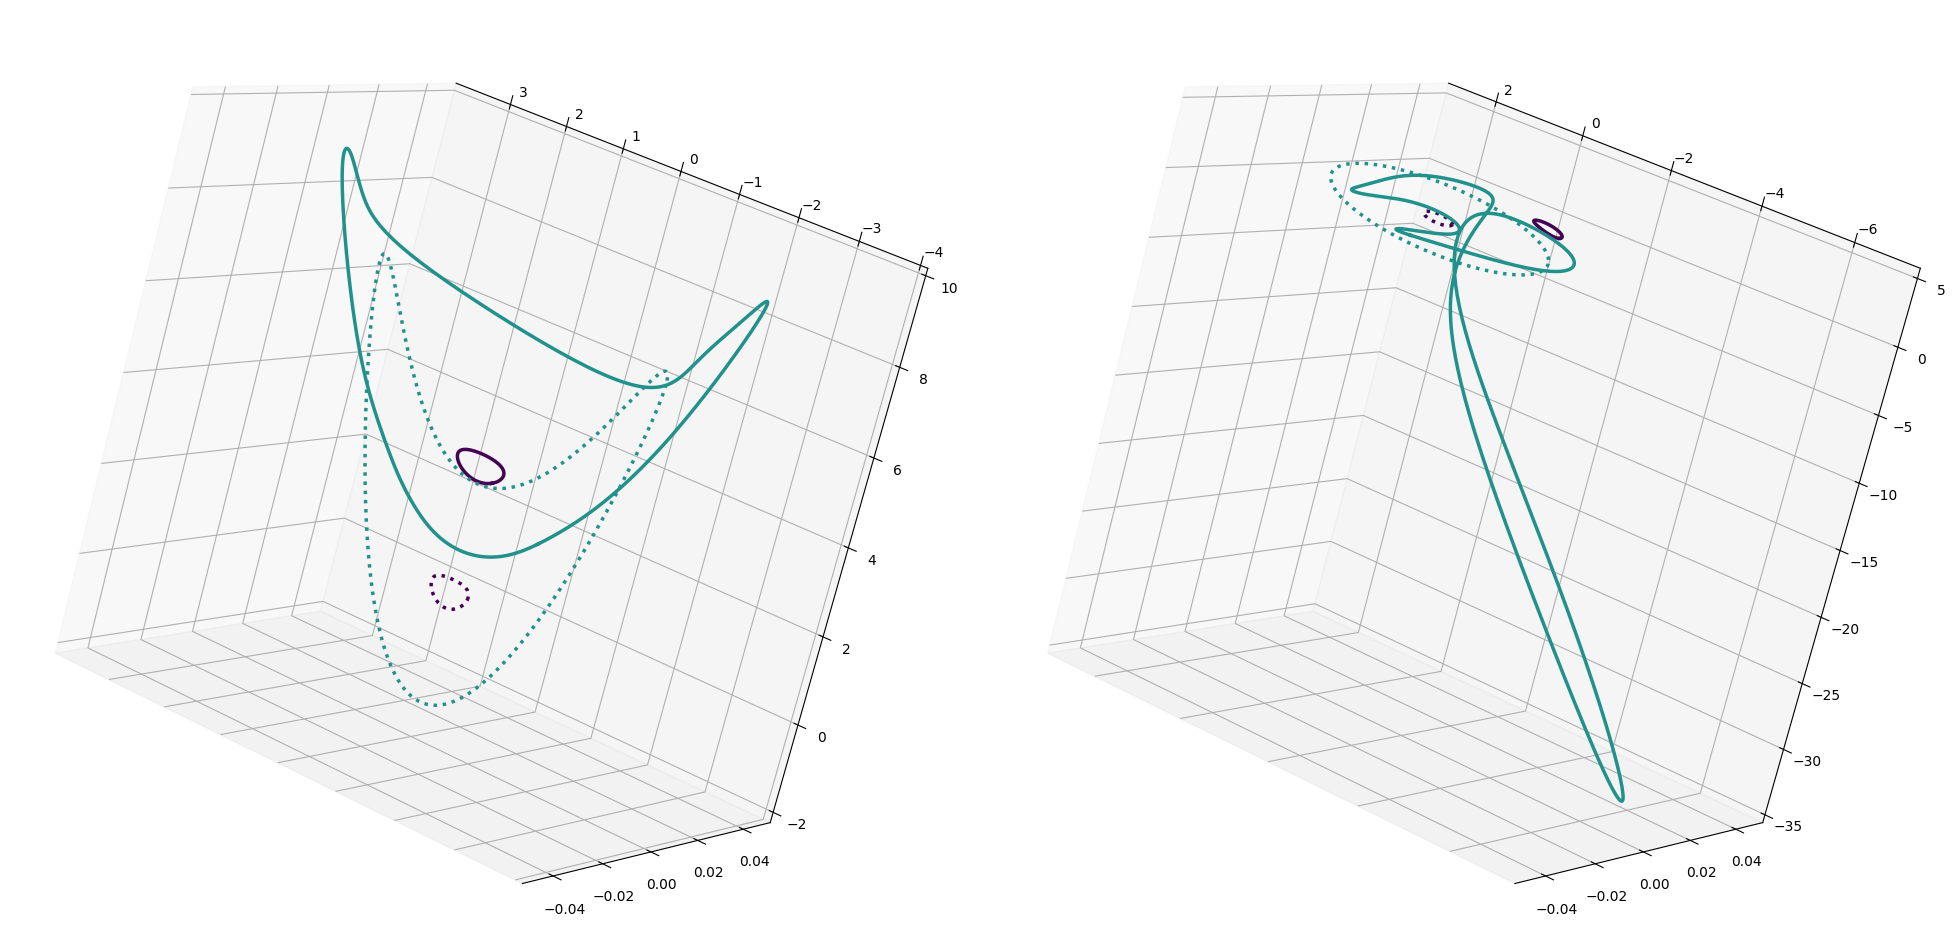

In [5]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import NotConditionalBananaDataset
dataset = NotConditionalBananaDataset(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.tensor([[1.]]),
    number_of_quantile_levels=2,
    tensor_parameters=experiment.tensor_parameters
)